In [ ]:
pip install spotipy
pip install pandas

In [12]:
float_cols = df.dtypes[df.dtypes == 'float64'].index.values

In [13]:
ohe_cols = 'popularity'

In [15]:
df['popularity'].describe()

count    50.000000
mean     84.478333
std       8.202248
min      67.000000
25%      77.500000
50%      86.666667
75%      92.000000
max      93.000000
Name: popularity, dtype: float64

In [68]:
def ohe_prep(df, column, new_name): 
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [31]:
df['genres']

0     conscious hip hop, hip hop, rap, west coast ra...
1                                       rap, slap house
2       conscious hip hop, hip hop, rap, west coast rap
3                      east coast hip hop, hip hop, rap
4       conscious hip hop, hip hop, rap, west coast rap
5     east coast hip hop, hip hop, instrumental hip ...
6       conscious hip hop, hip hop, rap, west coast rap
7                                       rap, slap house
8       conscious hip hop, hip hop, rap, west coast rap
9     east coast hip hop, hip hop, rap, etherpop, me...
10      conscious hip hop, hip hop, rap, west coast rap
11                                             r&b, rap
12    conscious hip hop, hip hop, rap, west coast ra...
13                                      rap, slap house
14      conscious hip hop, hip hop, rap, west coast rap
15                     east coast hip hop, hip hop, rap
16    conscious hip hop, hip hop, rap, west coast ra...
17                            atl hip hop, hip h

In [41]:


# Example function to convert genres to list (you might already have this)
df['genres'] = df['genres'].apply(lambda x: x.split(', '))

# tfidf genre lists
tfidf = TfidfVectorizer(stop_words='english')  # Adjust stop words as needed
tfidf_matrix = tfidf.fit_transform(df['genres'].apply(lambda x: " ".join(x)))

# Create genre DataFrame
genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)

# Concatenate TF-IDF genre features to the main dataframe
df = pd.concat([df, genre_df], axis=1)

# Now df contains the original columns 'name' and 'genres', along with TF-IDF genre features
df.head()  # Display the first few rows to verify


,name,artist,genres,popularity,album,danceability,energy,key,loudness,mode,...,rap,room,slap,soul,south,southern,trap,underground,urban,west
0,LOYALTY. FEAT. RIHANNA.,"Kendrick Lamar, Rihanna","[conscious hip hop, hip hop, rap, west coast r...",90.5,DAMN.,0.658,0.535,9,-8.983,0,...,0.209221,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.378075,0.181559
1,SKELETONS,Travis Scott,"[rap, slap house]",92.0,ASTROWORLD,0.460,0.686,0,-5.948,0,...,0.254286,0.0,0.683863,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Alright,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",92.0,To Pimp A Butterfly,0.796,0.766,7,-5.974,1,...,0.403394,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.350058
3,Sundress,A$AP Rocky,"[east coast hip hop, hip hop, rap]",83.0,Sundress,0.721,0.707,6,-6.364,1,...,0.199145,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Count Me Out,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",92.0,Mr. Morale & The Big Steppers,0.776,0.431,4,-7.544,0,...,0.403394,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.350058


In [73]:
df['genres'].head()

0    conscious hip hop, hip hop, rap, west coast ra...
1                                      rap, slap house
2    east coast hip hop, hip hop, instrumental hip ...
3      conscious hip hop, hip hop, rap, west coast rap
4                     east coast hip hop, hip hop, rap
Name: genres, dtype: object

In [91]:
df['ids'] = df.index  # Assigns the DataFrame index as IDs

# Display the DataFrame with the 'ids' column
df.head()

,name,artist,genres,popularity,album,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_red,ids
0,LOYALTY. FEAT. RIHANNA.,"Kendrick Lamar, Rihanna","conscious hip hop, hip hop, rap, west coast ra...",90.5,DAMN.,2017,0.658,0.535,9,-8.983,0,0.0573,0.02650,0.000000,0.2000,0.419,110.684,18,0
1,SKELETONS,Travis Scott,"rap, slap house",90.5,ASTROWORLD,2018,0.460,0.686,0,-5.948,0,0.0367,0.00146,0.000000,0.3750,0.252,148.054,18,1
2,Rapp Snitch Knishes feat. Mr. Fantastik,MF DOOM,"east coast hip hop, hip hop, instrumental hip ...",90.5,MM...FOOD,2004,0.728,0.832,7,-6.827,1,0.2670,0.32700,0.000000,0.5040,0.825,95.051,18,2
3,Mirror,Kendrick Lamar,"conscious hip hop, hip hop, rap, west coast rap",90.5,Mr. Morale & The Big Steppers,2022,0.652,0.670,2,-8.766,1,0.0639,0.22500,0.000014,0.0804,0.274,91.933,18,3
4,Sundress,A$AP Rocky,"east coast hip hop, hip hop, rap",90.5,Sundress,2018,0.721,0.707,6,-6.364,1,0.0595,0.18100,0.000004,0.1430,0.743,125.005,18,4


In [212]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Set environment variables within the notebook
os.environ['SPOTIPY_CLIENT_ID'] = 'YOUR_CLIENT_ID'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'YOUR_CLIENT_SECRET'
os.environ['SPOTIPY_REDIRECT_URI'] = 'https://localhost:8000'
if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

# Set a custom cache path
cache_path = './spotify_cache'

# Authentication with Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, cache_path='./spotify_cache'))

# Function to fetch all tracks in the playlist
def get_playlist_tracks(sp, playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Function to get genres for an artist
def get_artist_genres(sp, artist_id):
    artist = sp.artist(artist_id)
    return artist['genres']

# Function to get popularity for an artist
def get_artist_popularity(sp, artist_id):
    artist = sp.artist(artist_id)
    return artist['popularity']

# Function to extract relevant data and create track_info
def extract_track_info(track):
    track_info = {}
    features = sp.audio_features(track['id'])[0]
    album = track['album']
    release_year = get_release_year(album)
    artists = track['artists']
    artist_names = [artist['name'] for artist in artists]
    artist_ids = [artist['id'] for artist in artists]
    artist_genres = [get_artist_genres(sp, artist_id) for artist_id in artist_ids]
    genres = [genre for genres_list in artist_genres for genre in genres_list]  # Flatten genres list
    artist_popularity = [get_artist_popularity(sp, artist_id) for artist_id in artist_ids]

    track_info = {
        'name': track['name'],
        'artist': ", ".join(artist_names),
        'genres': ", ".join(genres),
        'id': track['id'],  # <-- Assigning the actual track ID here
        'popularity': sum(artist_popularity) / len(artist_popularity) if artist_popularity else 0,
        'album': track['album']['name'],
        'year': release_year,
        'danceability': features['danceability'],
        'energy': features['energy'],
        'key': features['key'],
        'loudness': features['loudness'],
        'mode': features['mode'],
        'speechiness': features['speechiness'],
        'acousticness': features['acousticness'],
        'instrumentalness': features['instrumentalness'],
        'liveness': features['liveness'],
        'popularity_red': int(track['popularity'] / 5) if 'popularity' in track else 0,
        'valence': features['valence'],
        'tempo': features['tempo']
    }
    return track_info

# Fetch playlist tracks
playlist_id = "37i9dQZF1EIZCsyhLFyG4d"
tracks = get_playlist_tracks(sp, playlist_id)
print(f"Number of tracks retrieved: {len(tracks)}")

# Extract relevant data for each track
track_data = []
for item in tracks:
    track = item['track']
    track_info = extract_track_info(track)
    track_data.append(track_info)

# Create DataFrame
df = pd.DataFrame(track_data)
print("DataFrame created successfully")

# Display the DataFrame
df.head()


Number of tracks retrieved: 50
DataFrame created successfully


,name,artist,genres,id,popularity,album,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,popularity_red,valence,tempo
0,LOYALTY. FEAT. RIHANNA.,"Kendrick Lamar, Rihanna","conscious hip hop, hip hop, rap, west coast ra...",6SwRhMLwNqEi6alNPVG00n,90.5,DAMN.,2017,0.658,0.535,9,-8.983,0,0.0573,0.02650,0.000000,0.200,15,0.419,110.684
1,SKELETONS,Travis Scott,"rap, slap house",6NMtzpDQBTOfJwMzgMX0zl,92.0,ASTROWORLD,2018,0.460,0.686,0,-5.948,0,0.0367,0.00146,0.000000,0.375,14,0.252,148.054
2,Rapp Snitch Knishes feat. Mr. Fantastik,MF DOOM,"alternative hip hop, east coast hip hop, hip h...",5KUNwkaNf8l5A9sXZhiCgI,74.0,MM...FOOD,2004,0.728,0.832,7,-6.827,1,0.2670,0.32700,0.000000,0.504,14,0.825,95.051
3,untitled 06 | 06.30.2014.,Kendrick Lamar,"conscious hip hop, hip hop, rap, west coast rap",4M2t7bP4Mq87mGMn0PObUX,92.0,untitled unmastered.,2016,0.669,0.541,4,-11.291,0,0.0461,0.09920,0.000008,0.254,11,0.645,89.083
4,Sundress,A$AP Rocky,"east coast hip hop, hip hop, rap",2aPTvyE09vUCRwVvj0I8WK,83.0,Sundress,2018,0.721,0.707,6,-6.364,1,0.0595,0.18100,0.000004,0.143,16,0.743,125.005


In [103]:
df['genres'].head()

0    conscious hip hop  hip hop  rap  west coast ra...
1                                      rap  slap house
2    east coast hip hop  hip hop  instrumental hip ...
3      conscious hip hop  hip hop  rap  west coast rap
4                     east coast hip hop  hip hop  rap
Name: genres, dtype: object

In [176]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Function to preprocess the genres data
def preprocess_genres(genres):
    if isinstance(genres, str) and genres.strip():
        return genres.replace(",", " ")
    return "unknown_genre"  # Default genre if empty

# Apply the preprocessing function to the genres column
df['genres'] = df['genres'].apply(preprocess_genres)

# Check if the genres column is not empty
print(df['genres'].head())

# Function to create feature set
def create_feature_set(df, float_cols):
    # Normalize float columns
    scaler = MinMaxScaler()
    df[float_cols] = scaler.fit_transform(df[float_cols])
    
    # Tfidf genre lists
    tfidf = TfidfVectorizer(stop_words=None)  # Ensure no stop words are removed
    tfidf_matrix = tfidf.fit_transform(df['genres'])
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    
    # Concatenate the genre data with the original DataFrame
    complete_feature_set = pd.concat([df, genre_df], axis=1)
    return complete_feature_set

# Create the feature set
complete_feature_set = create_feature_set(df, float_cols=float_cols)

# Display the feature set
complete_feature_set.head()


0    conscious hip hop  hip hop  rap  west coast ra...
1                                      rap  slap house
2    east coast hip hop  hip hop  instrumental hip ...
3      conscious hip hop  hip hop  rap  west coast rap
4                     east coast hip hop  hip hop  rap
Name: genres, dtype: object


,name,artist,genres,id,popularity,album,year,danceability,energy,key,...,genre|rap,genre|room,genre|slap,genre|soul,genre|south,genre|southern,genre|trap,genre|underground,genre|urban,genre|west
0,LOYALTY. FEAT. RIHANNA.,"Kendrick Lamar, Rihanna",conscious hip hop hip hop rap west coast ra...,6SwRhMLwNqEi6alNPVG00n,0.903846,DAMN.,2017,0.497196,0.504174,0.818182,...,0.208856,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.377414,0.185822
1,SKELETONS,Travis Scott,rap slap house,6NMtzpDQBTOfJwMzgMX0zl,0.961538,ASTROWORLD,2018,0.127103,0.756260,0.000000,...,0.264487,0.0,0.681926,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Rapp Snitch Knishes feat. Mr. Fantastik,MF DOOM,east coast hip hop hip hop instrumental hip ...,5KUNwkaNf8l5A9sXZhiCgI,0.269231,MM...FOOD,2004,0.628037,1.000000,0.636364,...,0.143046,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,Mirror,Kendrick Lamar,conscious hip hop hip hop rap west coast rap,5xoYormSTltk6F9SlQV6mm,0.961538,Mr. Morale & The Big Steppers,2022,0.485981,0.729549,0.181818,...,0.400793,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.356591
4,Sundress,A$AP Rocky,east coast hip hop hip hop rap,2aPTvyE09vUCRwVvj0I8WK,0.615385,Sundress,2018,0.614953,0.791319,0.545455,...,0.203415,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [131]:
token = util.prompt_for_user_token(scope, client_id=os.environ['SPOTIPY_CLIENT_ID'], client_secret=os.environ['SPOTIPY_CLIENT_SECRET'], redirect_uri=os.environ['SPOTIPY_REDIRECT_URI'])
sp = spotipy.Spotify(auth=token)
scope = "user-library-read playlist-read-private"

id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:

    id_name[i['name']] = i['uri'].split(':')[2]
    list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']



In [132]:
id_name

{'Random shits': '2vEubOrTQc8XTZiW7TBw3G'}

In [149]:
def create_necessary_outputs(playlist_name,id_dic, df):   
    #generate playlist dataframe
    playlist = pd.DataFrame()
    playlist_name = playlist_name

    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        #print(i['track']['artists'][0]['name'])
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['id'].isin(df['id'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [134]:
id_name

{'Random shits': '2vEubOrTQc8XTZiW7TBw3G'}

In [157]:
playlist = create_necessary_outputs('Random shits', id_name,df)

In [659]:
sp_oauth = SpotifyOAuth(scope=scope, cache_path='spotify_cache')
token_info = sp_oauth.get_cached_token()
if not token_info:
    token_info = sp_oauth.get_access_token()

# Initialize Spotify object with user token
sp = spotipy.Spotify(auth=token_info['access_token'])

# Function to refresh token if needed
def get_spotify_client():
    global token_info
    if sp_oauth.is_token_expired(token_info):
        token_info = sp_oauth.refresh_access_token(token_info['refresh_token'])
        sp = spotipy.Spotify(auth=token_info['access_token'])
    return sp

In [660]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io

def visualize_songs(df):    
    temp = df['url'].tolist()
    columns = 5
    rows = (len(temp) // columns) + 1

    plt.figure(figsize=(20, 10))
    for i, url in enumerate(temp):
        plt.subplot(rows, columns, i + 1)
        image = io.imread(url)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [342]:
playlist

,artist,name,id,url,date_added
3,MF DOOM,Rapp Snitch Knishes feat. Mr. Fantastik,5KUNwkaNf8l5A9sXZhiCgI,https://i.scdn.co/image/ab67616d00001e0252f194...,2024-01-27 09:19:48+00:00


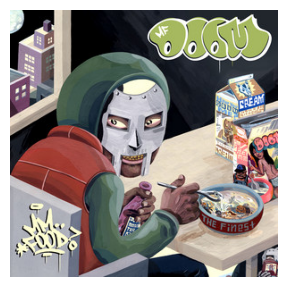

In [343]:
visualize_songs(playlist)

In [518]:
import pandas as pd

def generate_playlist_feature(complete_feature_set, playlist_df, weight_factor):
    # Extract playlist and non-playlist feature sets
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]
    
    # Merge playlist with date_added and sort by descending date_added
    playlist_feature_set = complete_feature_set_playlist.merge(playlist_df[['id','date_added']], on='id', how='inner').sort_values('date_added', ascending=False)
    
    # Calculate weight based on months_from_recent
    most_recent_date = playlist_feature_set.iloc[0, -1]
    playlist_feature_set['months_from_recent'] = (most_recent_date - playlist_feature_set['date_added']).dt.days // 30
    playlist_feature_set['weight'] = playlist_feature_set['months_from_recent'].apply(lambda x: weight_factor ** (-x))    
    
    # Make a copy for weighted calculations
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    # Ensure 'weight' column is numeric and handle NaN values
    playlist_feature_set_weighted['weight'] = pd.to_numeric(playlist_feature_set_weighted['weight'], errors='coerce')
    playlist_feature_set_weighted['weight'].fillna(0, inplace=True)  # Example: filling NaN with 0
    
    # Exclude specified columns and check for non-numeric values
    columns_for_cosine_similarity = [col for col in playlist_feature_set_weighted.columns if col not in ['artist', 'id','date_added', 'name', 'genres', 'album']]
    playlist_feature_set_weighted_final = playlist_feature_set_weighted[columns_for_cosine_similarity]
    
    # Print unique values of each column to debug non-numeric values
    # for col in playlist_feature_set_weighted_final.columns:
    #     unique_values = playlist_feature_set_weighted_final[col].unique()
    #     print(f"Unique values in '{col}': {unique_values}")
    
    # try:
    #     # Convert relevant columns to float if necessary
    #     playlist_feature_set_weighted_final = playlist_feature_set_weighted_final.astype(float)
    # except ValueError as e:
    #     print(f"Error converting to float: {e}")
    
    # Perform element-wise multiplication
    playlist_feature_set_weighted_final = playlist_feature_set_weighted_final.mul(playlist_feature_set_weighted['weight'], axis=0)
    
    # Return summed features and non-playlist features
    return playlist_feature_set_weighted_final.sum(axis=0), complete_feature_set_nonplaylist


In [519]:
complete_feature_set_playlist_vector, complete_feature_set_nonplaylist_random = generate_playlist_feature(complete_feature_set, playlist, 1.09)

In [520]:
complete_feature_set_playlist_vector_random.shape

(59,)

In [449]:
df['id'].dtyp

dtype('O')

In [573]:
complete_feature_set_nonplaylist_random.shape

(49, 65)

In [667]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def generate_playlist_recos(df, features, nonplaylist_features):
    # Ensure 'genre|west' column is dropped if present
    features_df = pd.DataFrame([features], columns=nonplaylist_features.columns)
    if 'genre|west' in features_df.columns:
        features_df = features_df.drop(columns=['genre|west'])
    
    if 'genre|west' in nonplaylist_features.columns:
        nonplaylist_features = nonplaylist_features.drop(columns=['genre|west'])
    
    # Select only numeric columns
    numeric_columns = nonplaylist_features.select_dtypes(include=np.number).columns
    
    # Ensure features_df has the same numeric columns as nonplaylist_features
    features_df_numeric = features_df[numeric_columns]
    
    # Filter out nonplaylist features with IDs not in df
    valid_ids = df['id'].values
    nonplaylist_features = nonplaylist_features[nonplaylist_features['id'].isin(valid_ids)]
    
    # Ensure nonplaylist_features has the same numeric columns
    nonplaylist_features_numeric = nonplaylist_features[numeric_columns]
    
    # Ensure both matrices have the same number of numeric columns
    if features_df_numeric.shape[1] != nonplaylist_features_numeric.shape[1]:
        print("Columns in features_df_numeric:", features_df_numeric.columns)
        print("Columns in nonplaylist_features_numeric:", nonplaylist_features_numeric.columns)
        raise ValueError("Number of numeric columns in nonplaylist_features and features_df must be the same.")
    
    # Check for NaN values in nonplaylist_features_numeric
    if nonplaylist_features_numeric.isnull().values.any():
        print("NaN values in nonplaylist_features_numeric:")
        print(nonplaylist_features_numeric.isnull().sum())
        raise ValueError("NaN values detected in nonplaylist_features_numeric.")
    
    # Calculate cosine similarity
    try:
        sim_scores = cosine_similarity(nonplaylist_features_numeric, features_df_numeric)
    except Exception as e:
        print(f"Error calculating cosine similarity: {e}")
        raise

    non_playlist_track_ids = nonplaylist_features['id'].values
    non_playlist_df = df[df['id'].isin(non_playlist_track_ids)]
    
    print(f"Length of sim_scores: {len(sim_scores)}")
    print(f"Length of non_playlist_df: {len(non_playlist_df)}")
    
    if len(sim_scores) != len(non_playlist_df):
        raise ValueError("Length of similarity scores does not match the number of non-playlist tracks.")

    non_playlist_df['sim'] = sim_scores[:, 0]

    # Sort by similarity and get top 40 recommendations
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim', ascending=False).head(40)
    
    # Fetch album image URLs
    # Assuming `sp` is your Spotify API instance
    non_playlist_df_top_40['url'] = non_playlist_df_top_40['id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return non_playlist_df_top_40


In [668]:
top40 = generate_playlist_recos(df, complete_feature_set_playlist_vector_random, complete_feature_set_nonplaylist_random)

Length of sim_scores: 44
Length of non_playlist_df: 44


In [572]:
complete_feature_set_playlist_vector_random.shape

(59,)

In [533]:
 complete_feature_set_nonplaylist_random.shape

(49, 65)

In [669]:
top40

,name,artist,genres,id,popularity,album,year,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,popularity_red,valence,tempo,sim,url
16,Fashion Killa,A$AP Rocky,"east coast hip hop, hip hop, rap",0O3TAouZE4vL9dM5SyxgvH,83.000000,LONG.LIVE.A$AP (Deluxe Version),2013,0.801,0.819,11,...,1,0.1580,0.29200,0.000000,0.5150,15,0.811,139.969,1.000000,https://i.scdn.co/image/ab67616d00001e022ae920...
13,Mirror,Kendrick Lamar,"conscious hip hop, hip hop, rap, west coast rap",5xoYormSTltk6F9SlQV6mm,92.000000,Mr. Morale & The Big Steppers,2022,0.652,0.670,2,...,1,0.0639,0.22500,0.000014,0.0804,12,0.274,91.933,1.000000,https://i.scdn.co/image/ab67616d00001e022e0211...
43,Not Like Us,Kendrick Lamar,"conscious hip hop, hip hop, rap, west coast rap",6AI3ezQ4o3HUoP6Dhudph3,92.000000,Not Like Us,2024,0.898,0.472,1,...,1,0.0776,0.01070,0.000000,0.1410,19,0.214,101.061,1.000000,https://i.scdn.co/image/ab67616d00001e021ea0c6...
39,THAT'S THAT,MF DOOM,"alternative hip hop, east coast hip hop, hip h...",2Vy16OMt19FH30uQNTFdLk,74.000000,BORN LIKE THIS,2009,0.499,0.728,8,...,0,0.3850,0.23500,0.000000,0.6860,13,0.853,96.089,1.000000,https://i.scdn.co/image/ab67616d00001e0273fcd3...
5,Alright,Kendrick Lamar,"conscious hip hop, hip hop, rap, west coast rap",3iVcZ5G6tvkXZkZKlMpIUs,92.000000,To Pimp A Butterfly,2015,0.796,0.766,7,...,1,0.2380,0.07420,0.000000,0.0827,15,0.558,110.034,1.000000,https://i.scdn.co/image/ab67616d00001e02cdb645...
37,Money Trees,"Kendrick Lamar, Jay Rock","conscious hip hop, hip hop, rap, west coast ra...",74tLlkN3rgVzRqQJgPfink,81.500000,"good kid, m.A.A.d city",2012,0.716,0.531,7,...,1,0.1570,0.07090,0.000000,0.2200,15,0.335,71.972,1.000000,https://i.scdn.co/image/ab67616d00001e022cd552...
11,N95,Kendrick Lamar,"conscious hip hop, hip hop, rap, west coast rap",0fX4oNGBWO3dSGUZcVdVV2,92.000000,Mr. Morale & The Big Steppers,2022,0.790,0.670,1,...,1,0.1050,0.37700,0.000002,0.1190,15,0.408,139.956,1.000000,https://i.scdn.co/image/ab67616d00001e022e0211...
36,drive ME crazy!,Lil Yachty,"atl hip hop, melodic rap, rap, trap",6luBKkFUt5wTwz7hpLhp12,77.000000,Let’s Start Here.,2023,0.497,0.825,10,...,0,0.0925,0.17200,0.003190,0.3770,14,0.440,107.073,1.000000,https://i.scdn.co/image/ab67616d00001e026f578b...
34,Dang! (feat. Anderson .Paak),"Mac Miller, Anderson .Paak","hip hop, pittsburgh rap, rap, escape room, hip...",5iUQMwxUPdJBFeGkePtM66,79.000000,The Divine Feminine,2016,0.836,0.670,5,...,0,0.2300,0.00826,0.000355,0.0837,14,0.556,107.018,1.000000,https://i.scdn.co/image/ab67616d00001e022e92f7...
24,BANDIT,Don Toliver,"pop rap, rap",0PHrcmOtDE89ew4vVEaD7S,85.000000,HARDSTONE PSYCHO,2024,0.680,0.794,2,...,1,0.0414,0.00585,0.000000,0.4730,14,0.111,130.109,1.000000,https://i.scdn.co/image/ab67616d00001e02c800e1...


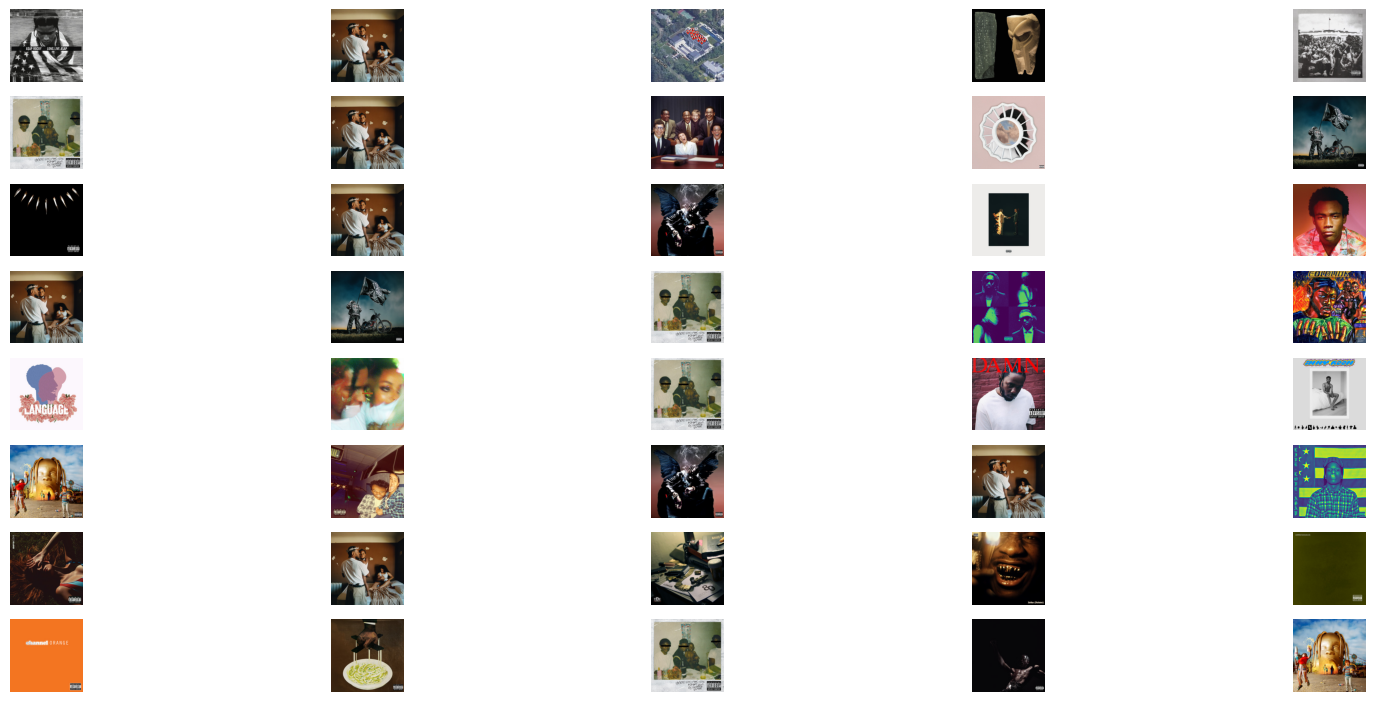

In [672]:
visualize_songs(top40)